# Python Collections

### Following are the container datatypes

* namedtupple
* deque
* Counter
* OrderedDict
* DefaultDict

### namedtupple

* <b>Returns a new tuple subclass named typename. 
* The new subclass is used to create tuple-like objects that have fields accessible by attribute lookup as well as being indexable and iterable.
* Instances of the subclass also have a helpful docstring (with typename and field_names) and a helpful __repr__() method which lists the tuple contents in a name=value format.</b>

#### namedtuple(typename, field_names, verbose=False, rename=False)

|Method|Description|
|------|-----------|
|<b>_asdict()</b>|Return a new OrderedDict which maps field names to their corresponding values.|
|<b>_make(iterable)</b>|Class method that makes a new instance from an existing sequence or iterable.|
|<b>_fields()</b>|Tuple of strings listing the field names.Useful for introspection and for creating new named tuple types from existing named tuples.|
|<b>_replace(kwargs)</b>|Return a new instance of the named tuple replacing specified fields with new values|

In [1]:
from collections import namedtuple

In [2]:
Rectangle = namedtuple('Rectangle',['width','height'],verbose=False)

In [3]:
print type(Rectangle)

<type 'type'>


In [4]:
r1 = Rectangle(10,20)
print type(r1)

<class '__main__.Rectangle'>


In [5]:
print r1
print r1._asdict()
rect = [(10,20),(1,2),(5,8)]
print map(Rectangle._make,rect)
print r1._fields
print r1._replace(width=12)
print getattr(r1,'height')

Rectangle(width=10, height=20)
OrderedDict([('width', 10), ('height', 20)])
[Rectangle(width=10, height=20), Rectangle(width=1, height=2), Rectangle(width=5, height=8)]
('width', 'height')
Rectangle(width=12, height=20)
20


In [6]:
import csv
country_record = namedtuple('countryRecord',['country_name','country_code','country_iso_code'],verbose=False)
country_tupple = map(country_record._make,csv.reader(open("country_codes.csv","rb")))
for c in country_tupple[0:3]:
    print c
    print c.country_name,c.country_iso_code

countryRecord(country_name='Afghanistan', country_code='93', country_iso_code='AF / AFG')
Afghanistan AF / AFG
countryRecord(country_name='Albania', country_code='355', country_iso_code='AL / ALB')
Albania AL / ALB
countryRecord(country_name='Algeria', country_code='213', country_iso_code='DZ / DZA')
Algeria DZ / DZA


### deque

* <b>Returns a new deque object initialized left-to-right (using append()) with data from iterable.</b>
* <b>If iterable is not specified, the new deque is empty.</b>
* <b>Deques are a generalization of stacks and queues (the name is pronounced “deck” and is short for “double-ended queue”).</b>
* <b>Deques support thread-safe, memory efficient appends and pops from either side of the deque</b>
* <b>Deques may grow to an arbitrary length</b>

|Method                |Description                            |
|----------------------|---------------------------------------|
|<b>append(x)</b>      |Add x to the right side of the deque.|
|<b>appendLeft(x)</b>  |Add x to the left side of the deque.|
|<b>clear()</b>        |Remove all elements from the deque leaving it with length 0.|
|<b>count(x)</b>       |Count the number of deque elements equal to x.|
|<b>extend(iterable)</b>|Extend the right side of the deque by appending elements from the iterable argument|
|<b>extendleft(iterable)</b>|Extend the left side of the deque by appending elements from iterable. Note, the series of left appends results in reversing the order of elements in the iterable argument.|
|<b>pop()</b>|Remove and return an element from the right side of the deque. If no elements are present, raises an IndexError.|
|<b>popleft()</b>|Remove and return an element from the left side of the deque. If no elements are present, raises an IndexError.|
|<b>remove(value)</b>|Removed the first occurrence of value. If not found, raises a ValueError.|
|<b>reverse()</b>|Reverse the elements of the deque in-place and then return None.|
|<b>rotate(n)</b>|Rotate the deque n steps to the right. If n is negative, rotate to the left. Rotating one step to the right is equivalent to: d.appendleft(d.pop()).|
|<b>maxlen</b>|Maximum size of a deque or None if unbounded.|

<b>Indexed access is O(1) at both ends but slows to O(n) in the middle. For fast random access, use lists instead.</b>

<b>Adding to or removing from the beginning of a list is O(n), but fetching elements from the middle is O(1). For a deque, the reverse is true.</b>

In [7]:
# random access - go for list
# accessing at the ends - go for deque

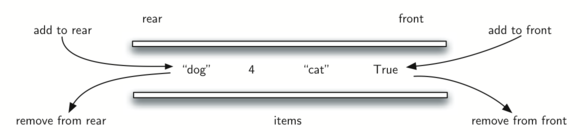

In [8]:
from IPython import display
display.Image("basicdeque.png")

In [9]:
from collections import deque

In [10]:
numberList = range(1,100000)
myque = deque(numberList)
print type(myque)

<type 'collections.deque'>


In [11]:
def get_element(deque_object):
    a = deque_object.pop()
    deque_object.append(a)
    return a

In [12]:
print get_element(myque)
print len(myque)

99999
99999


In [13]:
newList = [100000,100001,100002]
myque.extend(newList)
print get_element(myque)
print len(myque)

100002
100002


In [14]:
try :
    value = 100001
    myque.remove(value)
except ValueError:
    print "Value " + str(value) + " not in myque"
print get_element(myque)

100002


In [15]:
rect = [(10,10),(20,20),(30,30),(40,40),(50,50)]
my_rect_deque = deque(map(Rectangle._make,rect))
print get_element(my_rect_deque)

Rectangle(width=50, height=50)


In [16]:
for a in range(len(my_rect_deque)):
    x = my_rect_deque.pop()
    print x
    my_rect_deque.appendleft(x)

Rectangle(width=50, height=50)
Rectangle(width=40, height=40)
Rectangle(width=30, height=30)
Rectangle(width=20, height=20)
Rectangle(width=10, height=10)


In [17]:
my_rect_deque.rotate(-2)

In [18]:
#import pandas as pd
#import numpy as np
#df = pd.read_html('https://countrycode.org/')[1]
#df.to_csv('country_codes.csv',index=False,header=False)

### Counter

* <b>A Counter is a dict subclass for counting hashable objects. 
* It is an unordered collection where elements are stored as dictionary keys and their counts are stored as dictionary values. 
* Counts are allowed to be any integer value including zero or negative counts. 
* The Counter class is similar to bags or multisets in other languages.
* Elements are counted from an iterable or initialized from another mapping (or counter):</b>

#### Counter objects support three methods beyond those available for all dictionaries:

|Method|Description|
|------|-----------|
|<b>elements()</b>|Return an iterator over elements repeating each as many times as its count.Elements are returned in arbitrary order.If an element’s count is less than one, elements() will ignore it.|
|<b>most_common([n])></b>|Return a list of the n most common elements and their counts from the most common to the least.If n is omitted or None, most_common() returns all elements in the counter.Elements with equal counts are ordered arbitrarily:|
|<b>subtract([iterable-or-mapping])</b>|Elements are subtracted from an iterable or from another mapping (or counter).Like dict.update() but subtracts counts instead of replacing them.Both inputs and outputs may be zero or negative.|

In [19]:
from collections import Counter

In [20]:
votes = ['bjp','congress','aap','bjp','bjp','bjp','congress','aap','bjp','bjp','jdal','bjp','congress','aap']

In [21]:
votes_counter = Counter(votes)

In [22]:
print votes_counter

Counter({'bjp': 7, 'aap': 3, 'congress': 3, 'jdal': 1})


In [23]:
print list(votes_counter.elements())

['jdal', 'aap', 'aap', 'aap', 'congress', 'congress', 'congress', 'bjp', 'bjp', 'bjp', 'bjp', 'bjp', 'bjp', 'bjp']


In [24]:
votes_counter.most_common(3)

[('bjp', 7), ('aap', 3), ('congress', 3)]

In [25]:
invalid_votes = ['bjp','aap','congress','newparty']

In [26]:
total_votes = Counter(votes)
total_votes.subtract(invalid_votes)
print total_votes

Counter({'bjp': 6, 'aap': 2, 'congress': 2, 'jdal': 1, 'newparty': -1})


In [27]:
total_votes.update(['aap','bjp','others'])
print total_votes

Counter({'bjp': 7, 'aap': 3, 'congress': 2, 'jdal': 1, 'others': 1, 'newparty': -1})


### OrderedDict

* <b>Return an instance of a dict subclass, supporting the usual dict methods.
* An OrderedDict is a dict that remembers the order that keys were first inserted.
* If a new entry overwrites an existing entry, the original insertion position is left unchanged.
* Deleting an entry and reinserting it will move it to the end.</b>



In [28]:
from collections import OrderedDict

In [29]:
new_ordered_dict = OrderedDict()

In [30]:
new_ordered_dict.update({'Root':47})

In [31]:
new_ordered_dict.update({'Parent1':40})

In [32]:
new_ordered_dict.update({'Parent2':38})

In [33]:
new_ordered_dict

OrderedDict([('Root', 47), ('Parent1', 40), ('Parent2', 38)])

In [34]:
xx = OrderedDict([('a',10),('b',20),('c',40)])
Person = namedtuple('Person',['name','age'],verbose=False)

In [35]:
persons = map(Person._make,[('jonh',25),('mary',16),('david',20),('karmen',5)])

In [36]:
persons_od = OrderedDict(sorted(persons,key=lambda x:x.age))

In [37]:
persons_od.update({'Tiger':60})
print persons_od

OrderedDict([('karmen', 5), ('mary', 16), ('david', 20), ('jonh', 25), ('Tiger', 60)])


In [38]:
persons_od.pop('karmen')
print persons_od

OrderedDict([('mary', 16), ('david', 20), ('jonh', 25), ('Tiger', 60)])


In [39]:
print persons_od.popitem()

('Tiger', 60)


In [40]:
print persons_od.popitem(last=False)

('mary', 16)


In [41]:
for x in reversed(persons_od):
    print x

jonh
david


### defaultdict

* <b>Returns a new dictionary-like object. 
* defaultdict is a subclass of the built-in dict class. 
* It overrides one method and adds one writable instance variable. 
* The remaining functionality is the same as for the dict class.
* The first argument provides the initial value for the default_factory attribute; it defaults to None.
* All remaining arguments are treated the same as if they were passed to the dict constructor, including keyword arguments.</b>

In [42]:
from collections import defaultdict

In [43]:
my_list = [('bjp','Modi'),('aap','Kejariwal'),('bjp','Rajnath'),('congress','Sonia'),('congress','Rahul'),('aap','Manish')]
my_def_dict = defaultdict(list)
for k,v in my_list:
    my_def_dict[k].append(v)
print my_def_dict

defaultdict(<type 'list'>, {'aap': ['Kejariwal', 'Manish'], 'congress': ['Sonia', 'Rahul'], 'bjp': ['Modi', 'Rajnath']})


In [44]:
bjp_party_people = my_def_dict.get('bjp')
print bjp_party_people

['Modi', 'Rajnath']


In [45]:
ramayan_characters = defaultdict(Person)

In [46]:
ramayan_characters['Ram'] = Person('Ram',35)
ramayan_characters['Lakshman'] = Person('Lakshman',30)
ramayan_characters['Sita'] = Person('Sita',28)
print ramayan_characters

defaultdict(<class '__main__.Person'>, {'Sita': Person(name='Sita', age=28), 'Ram': Person(name='Ram', age=35), 'Lakshman': Person(name='Lakshman', age=30)})


In [47]:
ramayan_characters['Lakshman'] = ramayan_characters['Lakshman']._replace(age=29)
print ramayan_characters['Lakshman']

Person(name='Lakshman', age=29)
